In [1]:
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Visualization.Viz import *
import matplotlib.pyplot as plt 

In [2]:
TMG = TissueMultiGraph('TMG_dev8.pkl')

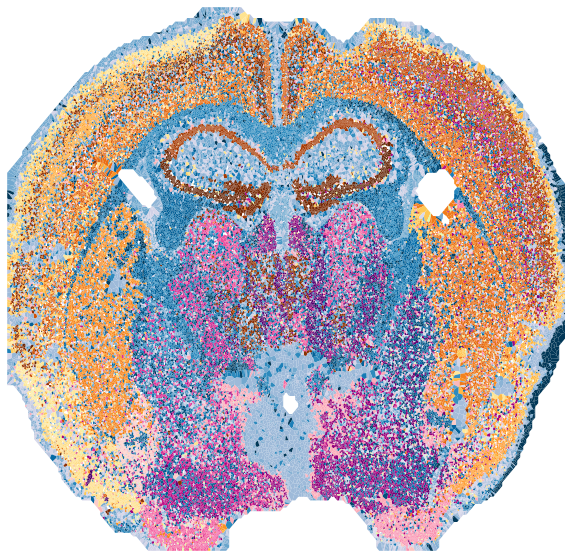

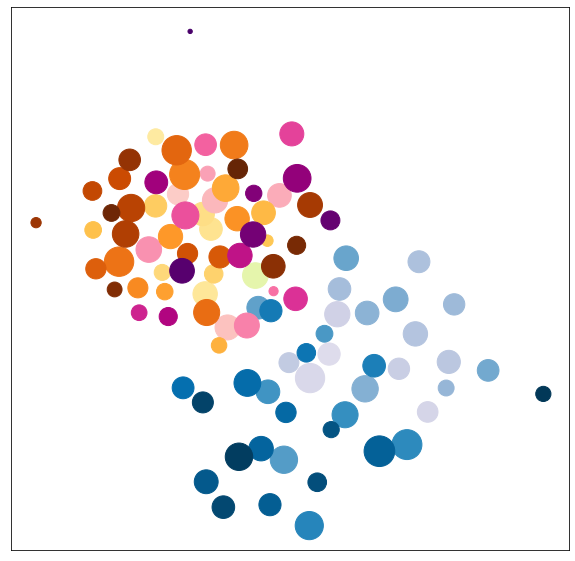

In [3]:
Vcellmap = CellMap(TMG)
Vcellmap.figsize = (10,10)
Vcellmap.cmap_list = ['YlOrBr','RdPu','PuBu','YlGn']
Vcellmap.set_view()
Vcellmap.plot()

/home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Visualization/Viz.py:381: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.segs = np.array(self.segs)


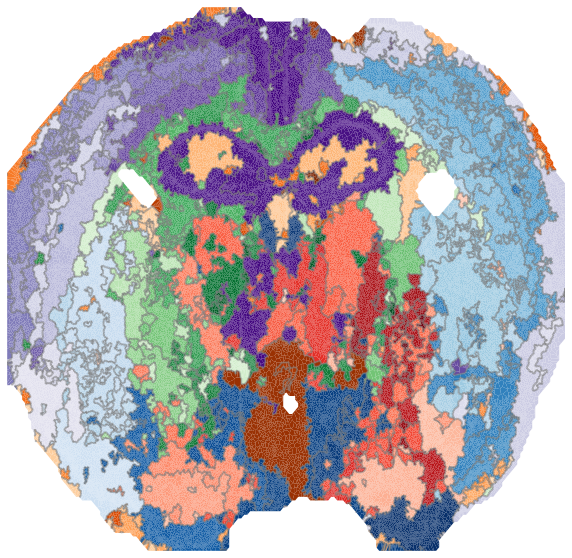

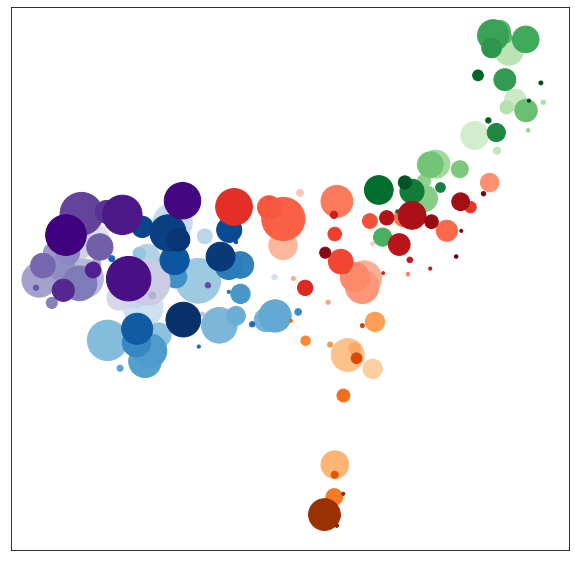

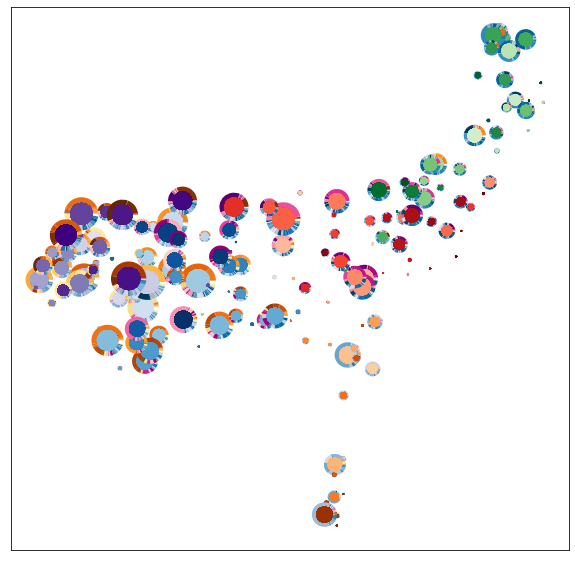

In [4]:
Vneighborhood = NeighborhoodMapWithLines(TMG)
Vneighborhood.figsize = (10,10)
Vneighborhood.cmap_list = ['Purples','Blues','Oranges','Reds','Greens','cividis']
Vneighborhood.set_view()
Vneighborhood.plot(Vcellmap)

In [6]:
pth='/home/rwollman/MyProjects/MaximallyInformativeBiocartography/FigForSlides/'
V1.figs[0].savefig(pth + 'CellMap.png')
V1.figs[1].savefig(pth + 'CellTypeScatter.png')

V3.figs[0].savefig(pth + 'RegionMap.png')
V3.figs[1].savefig(pth + 'RegionTypeScatter.png')
V3.figs[2].savefig(pth + 'RegionTypeScatterWithPies.png')


Text(0, 0.5, 'Freq')

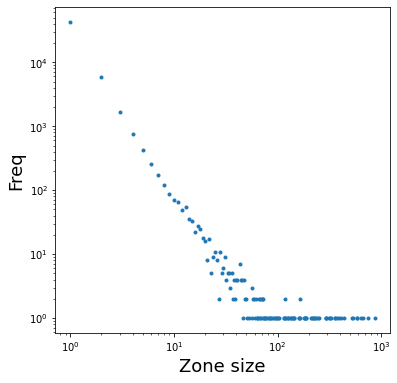

In [23]:
sz,cnt = np.unique(TMG.Layers[1].node_size,return_counts=True)
plt.figure(figsize=(6,6))
plt.loglog(sz,cnt,'.')
plt.xlabel('Zone size',fontsize=18)
plt.ylabel('Freq',fontsize=18)
# plt.savefig(pth+'Zone size distribution.png')

Text(0, 0.5, 'Freq')

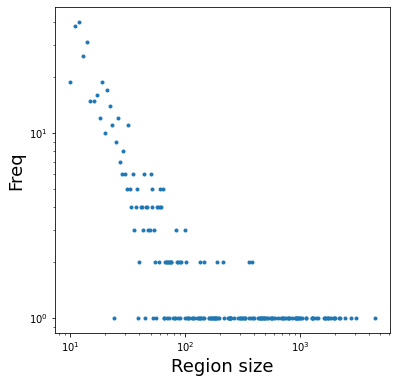

In [24]:
sz,cnt = np.unique(TMG.Layers[3].node_size,return_counts=True)
plt.figure(figsize=(6,6))
plt.loglog(sz[1:],cnt[1:],'.')
plt.xlabel('Region size',fontsize = 18)
plt.ylabel('Freq',fontsize=18)
# plt.savefig(pth+'Region size distribution.png')

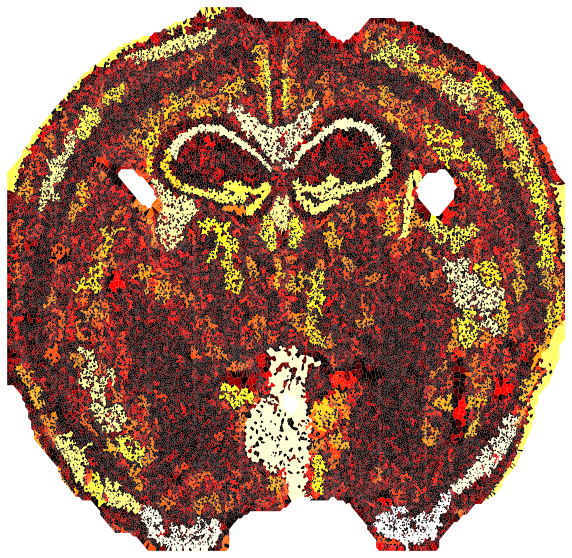

In [26]:
Vz2 = PolygonShowCustomValues(TMG,values_to_map = np.log10(TMG.Layers[1].node_size))
Vz2.figsize = (10,10)
Vz2.set_view()
Vz2.plot()
# Vz2.figs[0].savefig(pth + 'ZoneMapColoredBySize.png')

In [ ]:
Vent = PolygonShowCustomValues(TMG,values_to_map = np.exp(TMG.cell_attributes['local_entropy']))
Vent.figsize = (10,10)
Vent.set_view()
Vent.plot()

In [3]:
TMG.cell_attributes

local_entropy  coherence
0           2.609685   0.207605
1           2.199336   0.235628
2           2.609685   0.207605
3           2.188202   0.223454
4           2.695648   0.284774
...              ...        ...
97781       2.250908   0.341501
97782       2.723550   0.277126
97783       2.862804   0.204988
97784       2.886874   0.152530
97785       0.466663   0.199605

[97786 rows x 2 columns]

In [8]:
class OnlyLines(View):
    def __init__(self,TMG,lvl,name = "only lines"):
        super().__init__(TMG,name = name)
        self.edge_levels = None
        self.edge_list = None
        self.segs = list()
        self.lvl = lvl
        self.lvl_widths = np.array([0.5,1,1.5,2])
        self.clr = '#FF310088'
    
    def set_view(self):
        mx_edge_lvl_dict = self.TMG.find_max_edge_level()
        geom_line_dict = self.TMG.Geoms['line']
        self.edge_levels = np.zeros(len(TMG.Geoms['line']),dtype='int')
        self.edge_list = np.zeros((len(self.TMG.Layers[0].SG.es),2))
        for i in range(len(self.TMG.Layers[0].SG.es)): 
            self.edge_list[i,:] = np.array(self.TMG.Layers[0].SG.es[i].tuple)
            self.edge_levels[i] = int(mx_edge_lvl_dict[tuple(self.edge_list[i,:])])
            self.segs.append(geom_line_dict[tuple(self.edge_list[i,:])])
        
        self.segs = np.array(self.segs,dtype='object')
        self.line_style['width'] = self.lvl_widths[self.edge_levels]
        self.line_style['color'] = np.repeat(self.clr ,len(self.edge_levels))
        
    def plot_lines(self): 
        # get lines sorted by key (which is by convention internally sorted)
        wdth = self.lvl_widths[self.lvl]
        ix = np.flatnonzero(self.line_style['width']<=self.lvl_widths[self.lvl])
            
        line_segments = LineCollection(self.segs[ix],linewidths=wdth,
                                           colors=self.line_style['color'])
        ax = plt.gca()
        ax.add_collection(line_segments)

        
class CoherenceView(OnlyLines):
    def __init__(self,TMG,name = "Coherence"):
        super().__init__(TMG,1,name = name)
        self.plot_points_flag = False
    
    def set_view(self):
        super().set_view()
        # set polygon colors (scalars style + colormsp)
        TMG.cell_attributes
        # scalar_mapping = -np.log10(self.TMG.cell_attributes['coherence'])
        scalar_mapping = self.TMG.cell_attributes['coherence']
        scalar_mapping = scalar_mapping/np.max(scalar_mapping)
        
        self.polygon_style['scalar'] = scalar_mapping
        
         # create the colormap
        self.clrmp = 'winter'
        
        # # set points
        # Peaks = self.TMG.Layers[1].watershed(Env,only_find_peaks = True)
        # Peaks = self.TMG.map_to_cell_level(1,Peaks)
        # self.point_style['show'] = Peaks>-1 
        
    def plot_points(self):
        print('plot points')
        if self.plot_points_flag:
            x = np.array(self.TMG.Layers[0].X)
            x = x[self.point_style['show']]
            y = np.array(self.TMG.Layers[0].Y)
            y = y[self.point_style['show']]
            plt.scatter(x=x,y=y,s=5,c='w')        

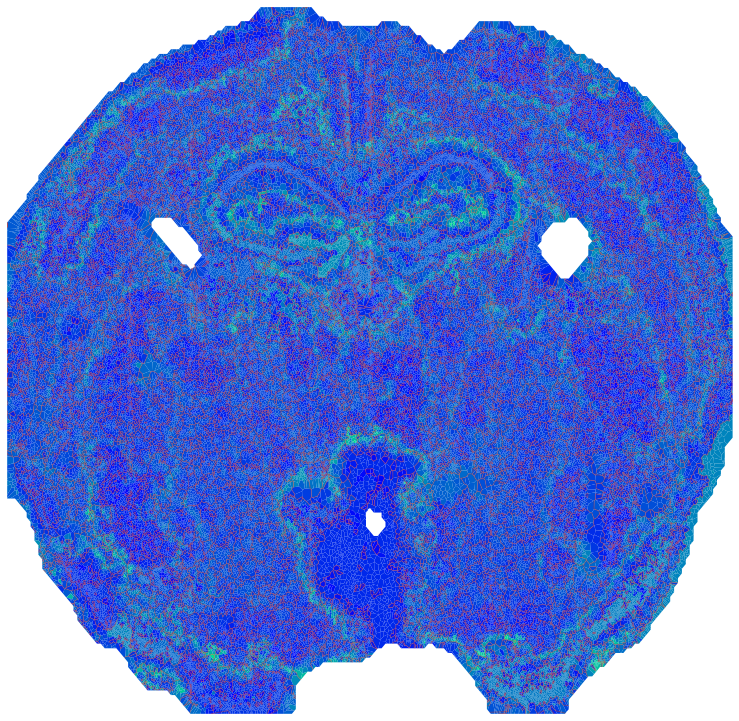

In [9]:
Vcoherence = CoherenceView(TMG)
Vcoherence.set_view()
Vcoherence.plot()
    
    

In [20]:
Vcoherence.plot_points_flag

True

In [34]:
p=np.array([[0.5,0.5],[0.25,0.75],[0.1,0.9]])
print(p)
entropy(p,axis=1)

[[0.5  0.5 ]
 [0.25 0.75]
 [0.1  0.9 ]]


array([0.69314718, 0.56233514, 0.32508297])

In [215]:
wdth = Vlines.lvl_widths[Vlines.lvl]
ix = np.flatnonzero(Vlines.line_style['width']==Vlines.lvl)
len(ix)

0

In [175]:
mx_edge_lvl_dict = TMG.find_max_edge_level()
line_dict = TMG.Geoms['line']
line_dict[(0,13)]

KeyError: (0, 13)

In [193]:
len(TMG.Layers[0].SG.es)

293282

In [183]:
line_keys = np.unique(np.array(list(line_dict.keys())),axis=0)
line_keys

array([[    6,     4],
       [    7,     2],
       [   10,     5],
       ...,
       [97785, 95964],
       [97785, 97767],
       [97785, 97780]])

In [88]:
lines_keys = sorted(list(TMG.Geoms['line'].keys()))

edge_levels = TMG.find_max_edge_level()
edge_level_keys = edge_levels.keys()
# edge_levels
# edge_levels[sorted(lines_keys[0])]

In [110]:
XY = TMG.Layers[0].XY
vor = Voronoi(XY)
dd=Delaunay(XY)
EL = np.zeros((dd.simplices.shape[0]*3,2))
for i in range(dd.simplices.shape[0]): 
    EL[i*3,:]=[dd.simplices[i,0],dd.simplices[i,1]]
    EL[i*3+1,:]=[dd.simplices[i,0],dd.simplices[i,2]]
    EL[i*3+2,:]=[dd.simplices[i,1],dd.simplices[i,2]]
    


In [160]:
TMG.add_geoms()
TMG.save('TMG_dev5.pkl')

In [159]:
ELsrt = np.sort(EL,axis=1)
print(ELsrt.shape)
ELunq = np.unique(ELsrt,axis=0)
print(ELunq.shape)

ELvor = np.array(vor.ridge_points)
ELvor = np.sort(EL3,axis=1)
ELvor = np.unique(ELvor,axis=0)
print(ELvor.shape)

np.all(np.equal(ELunq,ELvor))



(586491, 2)
(293282, 2)
(293282, 2)


True

In [118]:
EL2 = np.zeros((len(TMG.Layers[0].SG.es),2))
for i in range(len(TMG.Layers[0].SG.es)): 
    EL2[i,:]=np.array(TMG.Layers[0].SG.es[i].tuple)

In [130]:
np.all(np.equal(dd.points,vor.points))

True

In [123]:
np.flatnonzero(np.logical_and(EL[:,0]==0,EL[:,1]==13))
# np.flatnonzero(np.logical_and(EL2[:,0]==0,EL2[:,1]==13))

array([], dtype=int64)

In [106]:
pnts = np.array(vor.ridge_points)
np.flatnonzero(pnts[:,1]==13)

array([], dtype=int64)

In [100]:
e = TMG.Layers[0].SG.es[0]
e.tuple



(0, 13)

In [2]:
TMG = TissueMultiGraph('TMG_dev5.pkl')
    
    


In [3]:
Vlines = OnlyLines(TMG,2)
Vlines.set_view()
Vlines.plot()

KeyError: (0.0, 13.0)

In [ ]:
class CoherenceView2(OnlyLines):
    def __init__(self,TMG,name = "Coherence"):
        super().__init__(TMG,name = name)
        self.plot_points_flag = True
        self.lvl = 2
    
    def set_view(self):
        
        # set polygon colors (scalars style + colormsp)
        Env = self.TMG.Layers[1].extract_environments(ordr = 3)
        (EdgeWeight,NodeWeight) = self.TMG.Layers[1].calc_graph_env_coherence(Env,dist_jsd)
        scalar_mapping = self.TMG.map_to_cell_level(1,VecToMap = -np.log10(NodeWeight))
        scalar_mapping = scalar_mapping/np.max(scalar_mapping)
        
        self.polygon_style['scalar'] = scalar_mapping
        
         # create the colormap
        self.clrmp = 'plasma'
        
        # set points
        Peaks = self.TMG.Layers[1].watershed(Env,only_find_peaks = True)
        Peaks = self.TMG.map_to_cell_level(1,Peaks)
        self.point_style['show'] = Peaks>-1 
        
    def plot_points(self):
        if self.plot_points_flag:
            x = np.array(self.TMG.Layers[0].X)
            x = x[self.point_style['show']]
            y = np.array(self.TMG.Layers[0].Y)
            y = y[self.point_style['show']]
            plt.scatter(x=x,y=y,s=5,c='w')

/home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Visualization/Viz.py:200: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  segs = np.array(segs)


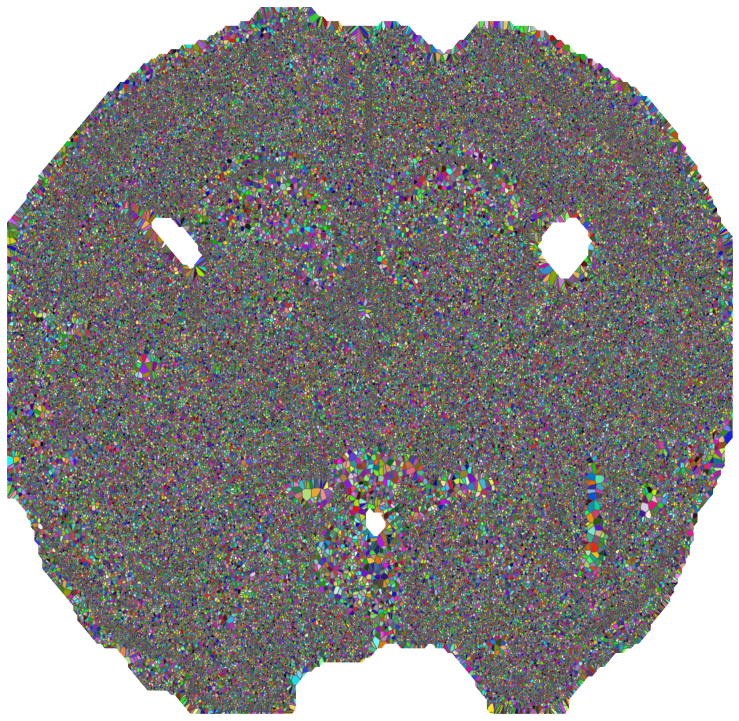

In [9]:
V = RandomPolygonColorByTypeWithLines(TMG)
V.set_view_weight()
V.set_view_line()
V.plot()